In [5]:
import imaplib
import os
import email
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

,Unnamed: 0,email_id,subject,content,cluster
0,0,17507c6cd2f5de5a,"Hello Mayur, Please use the below Login Code t...",SGVsbG8gPHN0cm9uZz5NYXl1cjwvc3Ryb25nPiw8YnI-PG...,0
1,1,175078fa6fa568ee,Hey KMKnation! A third-party OAuth application...,SGV5IEtNS25hdGlvbiENCg0KQSB0aGlyZC1wYXJ0eSBPQX...,0
2,2,175076ed7c8139a7,"Hi Mayur Kanojiya, 1357 users successfully sol...",PCFET0NUWVBFIGh0bWwgUFVCTElDICItLy9XM0MvL0RURC...,0
3,3,1750750fadae357a,Speakers Facebook Twitter Linkedin Instagram y...,PCFET0NUWVBFIGh0bWwNCglQVUJMSUMgIi0vL1czQy8vRF...,0
4,4,175070e2e853644e,Presenting OST: Official Snack Time on Swiggy ...,PCFET0NUWVBFIGh0bWwgUFVCTElDICItLy9XM0MvL0RURC...,0


In [8]:
df.shape

(2473, 5)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import re

In [11]:
#ltk.download()

In [12]:
nltk.download('stopwords')
##Remove stopwords (does not contribute much in sentence)
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/hb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def clean_text(text):
    text = sttext.replace('[image: Google]', '')
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    tokens = [word.lower() for word in tokens]
    text = [word for word in tokens if word not in stopword]
    text = [word for word in text if len(word) > 1]
    
    return text


In [17]:
df['clean'] = df['subject'].apply(lambda x: clean_text(x))

TypeError: 'float' object is not iterable

In [15]:
df.head()

,content,clean
0,[image: Google] Recovery phone was changed ...,"[recovery, phone, changed, recovery, phone, ac..."
1,"*Your Services Agreement made clearer* Hello,...","[services, agreement, made, clearer, hello, re..."
2,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
3,"Hey Asfina, Welcome to Google+ - were glad yo...","[hey, asfina, welcome, google, glad, youre, he..."
4,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."


In [16]:
df

,content,clean
0,[image: Google] Recovery phone was changed ...,"[recovery, phone, changed, recovery, phone, ac..."
1,"*Your Services Agreement made clearer* Hello,...","[services, agreement, made, clearer, hello, re..."
2,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
3,"Hey Asfina, Welcome to Google+ - were glad yo...","[hey, asfina, welcome, google, glad, youre, he..."
4,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
5,"Thank You Again, asfina! You now have access ...","[thank, asfina, access, shipment, samples, com..."
6,Hi Welcome to your free trial of Music Premi...,"[hi, welcome, free, trial, music, premium, mem..."
7,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr..."
8,Your account is listed as the recovery email ...,"[account, listed, recovery, email, dont, recog..."
9,"Asfina, heres your 2019 Timeline update Youre...","[asfina, heres, 2019, timeline, update, youre,..."


In [17]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer=clean_text)

In [18]:
data_matrix=vectorizer.fit_transform(df['content'])
print("\n Feature names Identified :\n")
# print(vectorizer.get_feature_names())


 Feature names Identified :



In [19]:
data_matrix.shape

(180, 2748)

In [20]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


1processed
2processed
3processed
4processed
5processed
6processed
7processed
8processed
9processed
10processed
11processed
12processed
13processed
14processed
15processed
16processed
17processed
18processed
19processed
20processed
21processed
22processed
23processed
24processed
25processed
26processed
27processed
28processed
29processed
30processed
31processed
32processed
33processed
34processed
35processed
36processed
37processed
38processed
39processed
40processed
41processed
42processed
43processed
44processed
45processed
46processed
47processed
48processed
49processed
Sum of squared distances :  [169.20000683493302, 157.92426580545413, 149.5784648442033, 143.97394257075422, 138.43442973700493, 135.56358146760934, 133.54780496116558, 130.38969792009974, 128.97452769522275, 124.23720941382724, 123.4136743689415, 121.52152863879132, 118.45266499172922, 118.32559811881205, 115.50365824526659, 113.97404634258332, 113.11713358621815, 109.83276967580092, 108.249310479784, 107.511499903346

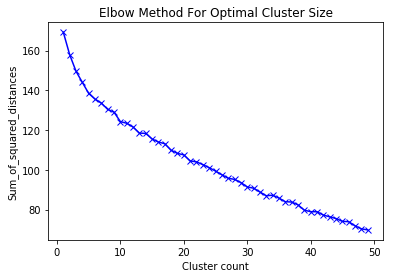

In [21]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_matrix)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [22]:
num_of_topic = 9

In [23]:
lda = LatentDirichletAllocation(
        n_components=num_of_topic, max_iter=5, 
        learning_method='online', random_state=0)
lda_mat = lda.fit_transform(data_matrix)

In [24]:
lda_mat.shape

(180, 9)

In [25]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans


1processed
2processed
3processed
4processed
5processed
6processed
7processed
8processed
9processed
10processed
11processed
12processed
13processed
14processed
15processed
16processed
17processed
18processed
19processed
20processed
21processed
22processed
23processed
24processed
25processed
26processed
27processed
28processed
29processed
30processed
31processed
32processed
33processed
34processed
35processed
36processed
37processed
38processed
39processed
40processed
41processed
42processed
43processed
44processed
45processed
46processed
47processed
48processed
49processed
Sum of squared distances :  [103.05692071597879, 73.39974452503387, 51.282074747189924, 34.88538804050916, 22.385973255126075, 13.92571445893185, 8.0224959895082, 3.1790618472521928, 0.7913703937422574, 0.5470534228898571, 0.43969967525188103, 0.34638976807602506, 0.2844486366095107, 0.2148654681769924, 0.1666007781178294, 0.1260298396646189, 0.07796025043604449, 0.06520401395804049, 0.05888505638271091, 0.05290677721

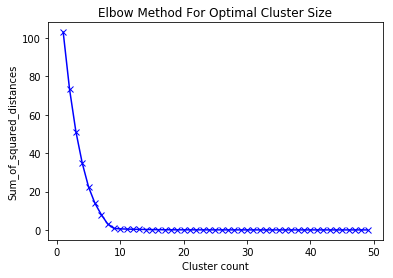

In [26]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
#     km = km.fit(data_matrix)
    km = km.fit(lda_mat)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

In [27]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=9).fit(lda_mat)

#get Cluster labels.
clusters=kmeans.labels_

In [28]:
df['cluster'] = clusters

In [29]:
df[df['cluster'] == 1]

,content,clean,cluster
2,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
3,"Hey Asfina, Welcome to Google+ - were glad yo...","[hey, asfina, welcome, google, glad, youre, he...",1
4,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
7,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
9,"Asfina, heres your 2019 Timeline update Youre...","[asfina, heres, 2019, timeline, update, youre,...",1
10,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
13,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
14,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
20,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1
22,Here are the newest videos from each of your s...,"[newest, videos, subscriptions, change, subscr...",1



Group :  0 
-------------------


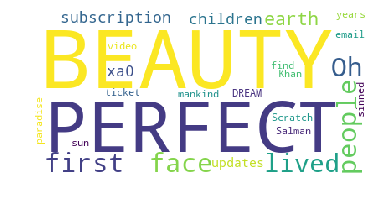


Group :  1 
-------------------


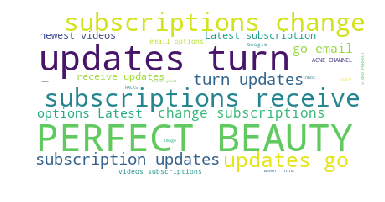


Group :  2 
-------------------


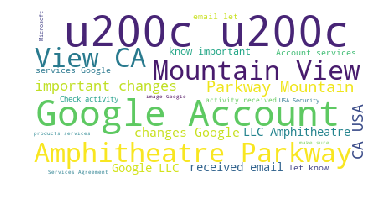


Group :  3 
-------------------


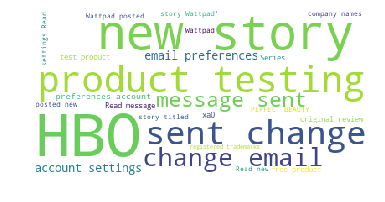


Group :  4 
-------------------


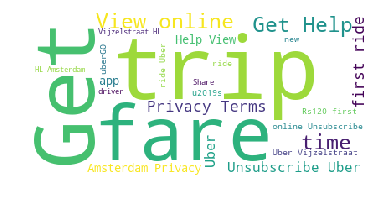


Group :  5 
-------------------


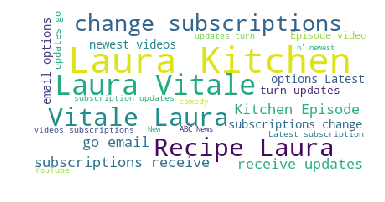


Group :  6 
-------------------


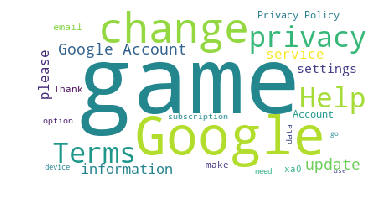


Group :  7 
-------------------


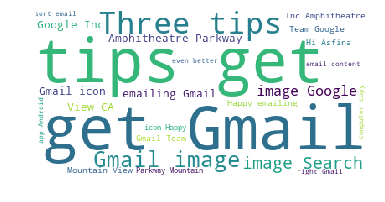


Group :  8 
-------------------


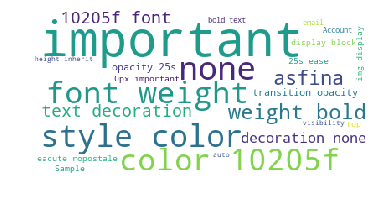

In [30]:
#Print cluster label and Courses under each cluster
from wordcloud import WordCloud
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")

    #Generate wordcloud data
    wordcloud = WordCloud(stopwords=stopword, max_words=25, \
                      background_color="white").generate(str(df[df['cluster'] == group]['content'].values))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


In [31]:
def build_lda(x_train, num_of_topic=7):
    vec = TfidfVectorizer(stop_words='english', analyzer=clean_text)
    transformed_x_train = vec.fit_transform(x_train)
    feature_names = vec.get_feature_names()
    
    lda = LatentDirichletAllocation(
        n_components=num_of_topic, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_x_train)
    return lda, vec, feature_names

In [32]:
def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)

In [33]:
lda_model, vec, feature_names = build_lda(df['content'], 9)
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=10)

Topic 0:
['updates', 'subscriptions', 'beauty', 'perfect', 'videos', 'acne', 'channel', 'turn', 'newest', 'latest']
Topic 1:
['gmail', 'image', 'updates', 'acne', 'sabri', 'google', 'get', 'amjad', 'sample', 'app']
Topic 2:
['wattpad', 'read', 'story', 'new', 'product', 'titled', 'posted', 'preferences', 'message', 'settings']
Topic 3:
['uber', 'ride', 'rs120', 'first', 'get', 'ubergo', 'amsterdam', 'trip', 'use', 'terms']
Topic 4:
['laura', 'kitchen', 'vitale', 'recipe', 'updates', '2013', 'subscriptions', 'abc', 'videos', 'news']
Topic 5:
['google', 'fat', 'terms', 'lose', 'account', 'remedies', 'home', 'information', 'privacy', 'changes']
Topic 6:
['google', 'account', 'check', 'signed', 'services', 'device', 'received', 'changes', 'usa', 'alert']
Topic 7:
['dream', 'talkies', 'earth', 'oh', 'children', 'lived', 'salman', 'people', 'asking', 'khan']
Topic 8:
['important', 'display', 'opacity', 'none', 'asfina', 'stylecolor10205f', 'accepted', 'max', 'block', '25s']


In [34]:
custom_data = ["Password reset requested for your Google Account"]

custom_matrix=vectorizer.transform(custom_data)


In [35]:
custom_matrix.shape

(1, 2748)

In [36]:
lda_mat = lda.transform(custom_matrix)

In [37]:
lda_mat.shape

(1, 9)

In [38]:
a = kmeans.predict(lda_mat)

In [39]:
a

array([6], dtype=int32)

Save the vectorizers and model

In [40]:
import pickle

In [41]:
pickle.dump(kmeans, open("kmeans.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf.pickle", "wb"))
pickle.dump(lda, open("lda.pickle", "wb"))

Now lets compare the eucledean distance of two sentences to see simillarity between them

In [44]:
sent_one = "Lose Your Double Chin and Tone Your Jawline with Faceworks by Faceworks Natural Facelift"
sent_one

'Lose Your Double Chin and Tone Your Jawline with Faceworks by Faceworks Natural Facelift'

In [45]:
sent_two = "Your account is listed as the recovery email for  Dont recognize this account?"
sent_two

'Your account is listed as the recovery email for  Dont recognize this account?'

In [46]:
sent_three = "Your account is listed as the recovery email for  Dont recognize this account?"
sent_three

'Your account is listed as the recovery email for  Dont recognize this account?'

In [47]:
def get_vector(sentence):
    vec = vectorizer.transform([sentence])
    vec = lda.transform(vec)
    return vec

In [48]:
from scipy.spatial import distance

In [49]:
d = distance.euclidean(get_vector(sent_three), get_vector(sent_two))
print("Euclidean distance: ",d)

Euclidean distance:  0.0


The distance is zero because both the sentences are same and in same cluster.
Lets change third sentence and calculate euclidean distance

In [50]:
sent_three = "Welcome back to your data If you suspect you were locked out of your data because of changes made by someone else"
sent_three

'Welcome back to your data If you suspect you were locked out of your data because of changes made by someone else'

In [51]:
d = distance.euclidean(get_vector(sent_three), get_vector(sent_one))
print("Euclidean distance: ",d)

Euclidean distance:  1.0373839228206843


In [52]:
d = distance.euclidean(get_vector(sent_three), get_vector(sent_two))
print("Euclidean distance: ",d)

Euclidean distance:  0.03629831829046589
